In [1]:
import numpy
import pandas

In [4]:
import os
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing import image 

In [6]:
img1=cv2.imread(r'E:\Image_forgery detection\Image_forgery detection\Datasets\NORMAL\NORMAL(0).jpg')
print(img1)

[[[32 32 32]
  [34 34 34]
  [33 33 33]
  ...
  [32 32 32]
  [33 33 33]
  [34 34 34]]

 [[33 33 33]
  [34 34 34]
  [32 32 32]
  ...
  [34 34 34]
  [34 34 34]
  [34 34 34]]

 [[34 34 34]
  [33 33 33]
  [30 30 30]
  ...
  [35 35 35]
  [34 34 34]
  [33 33 33]]

 ...

 [[28 28 28]
  [29 29 29]
  [29 29 29]
  ...
  [33 33 33]
  [34 34 34]
  [35 35 35]]

 [[29 29 29]
  [29 29 29]
  [30 30 30]
  ...
  [34 34 34]
  [34 34 34]
  [35 35 35]]

 [[29 29 29]
  [30 30 30]
  [30 30 30]
  ...
  [35 35 35]
  [35 35 35]
  [34 34 34]]]


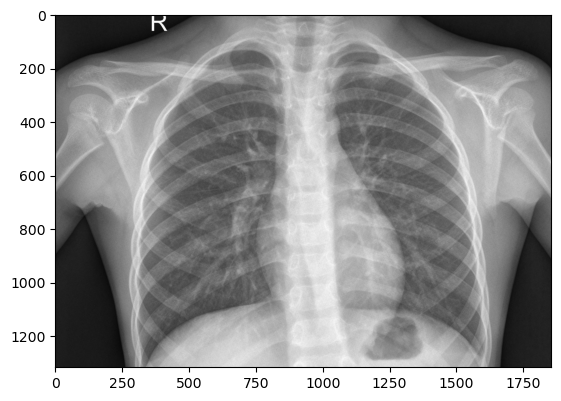

In [7]:
#previewing the image using open cv 
plt.imshow(img1)

In [8]:
#evaluating the size of the image 
print("the shape of the image ")
print(img1.shape)
#so we can see that the image has height=64 px , width=64 px , channel= 3
#so the image is an rgb image

the shape of the image 
(1317, 1855, 3)


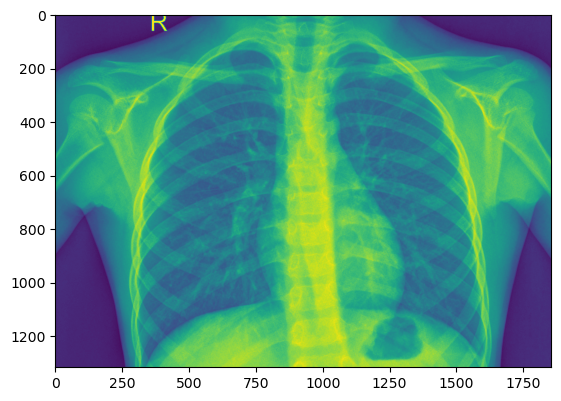

In [9]:
img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [10]:
img_gray.shape

(1317, 1855)

In [11]:
img_gray

array([[32, 34, 33, ..., 32, 33, 34],
       [33, 34, 32, ..., 34, 34, 34],
       [34, 33, 30, ..., 35, 34, 33],
       ...,
       [28, 29, 29, ..., 33, 34, 35],
       [29, 29, 30, ..., 34, 34, 35],
       [29, 30, 30, ..., 35, 35, 34]], dtype=uint8)

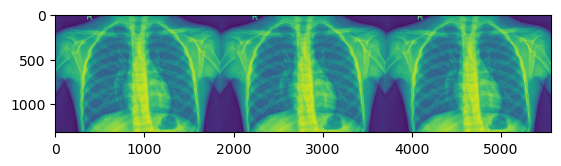

In [12]:
#playing with the colors of the image 
import numpy as np
imgblue=img1[:,:,0]
imggreen=img1[:,:,1]
imgred=img1[:,:,2]
new_image=np.hstack((imgblue,imggreen,imgred))
plt.imshow(new_image)
#so here we can see that since the image does not contain any colors whatever the changes made in the 
#color channel does not reflect on the image 

(([], []), ([], []))

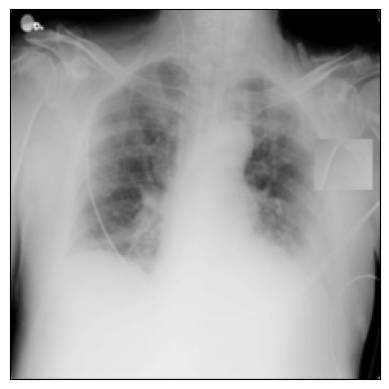

In [14]:
img = cv2.imread(r'E:\Image_forgery detection\Image_forgery detection\Datasets\Forged\Image_1.png.png', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Text(0, 0.5, 'Frequency')

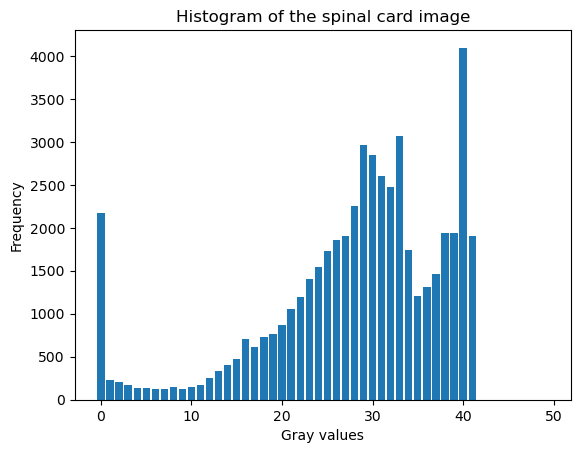

In [15]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the spinal card image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

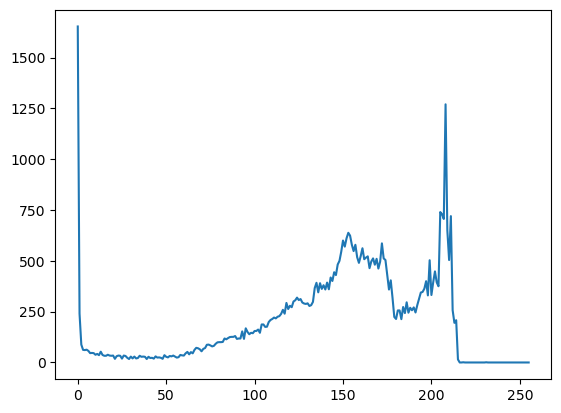

In [16]:
import numpy as np
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [17]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

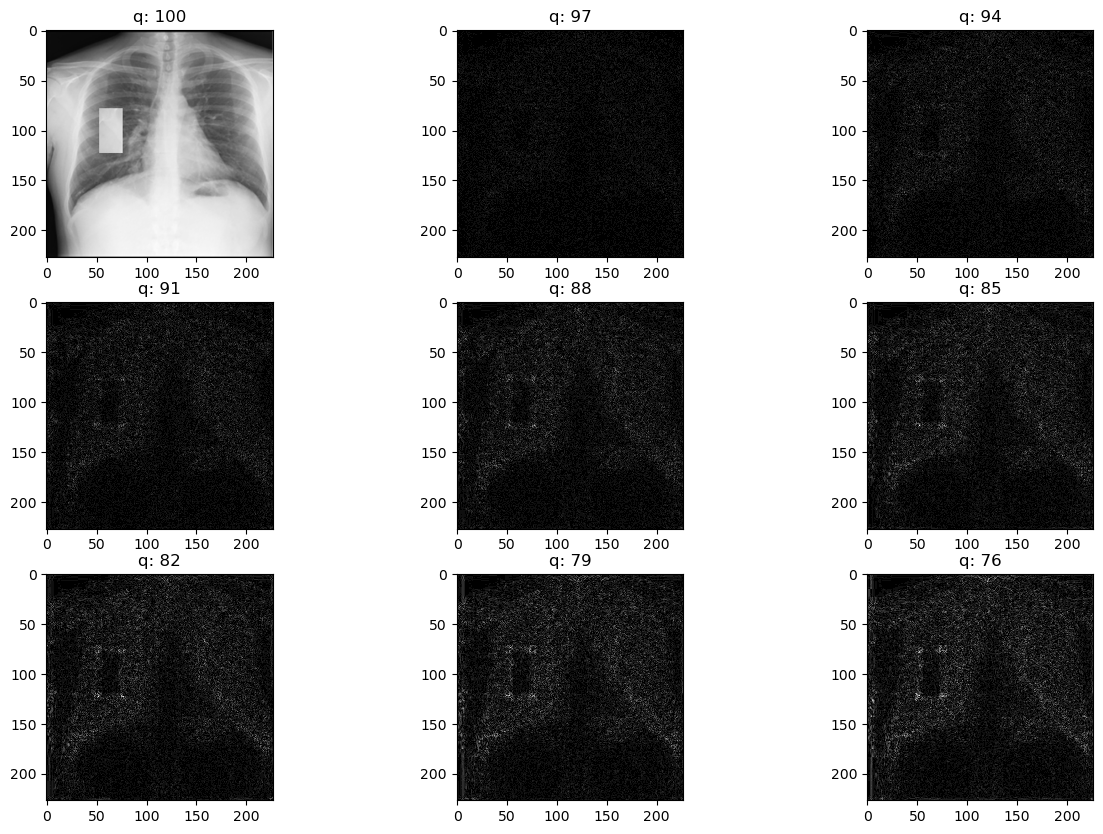

In [20]:
#test on tmpered image
orig = cv2.imread(r"E:\Image_forgery detection\Image_forgery detection\Datasets\Forged\Image_7.png.PNG")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 3
    img = compute_ela_cv(path=r"E:\Image_forgery detection\Image_forgery detection\Datasets\Forged\Image_7.png.PNG", quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

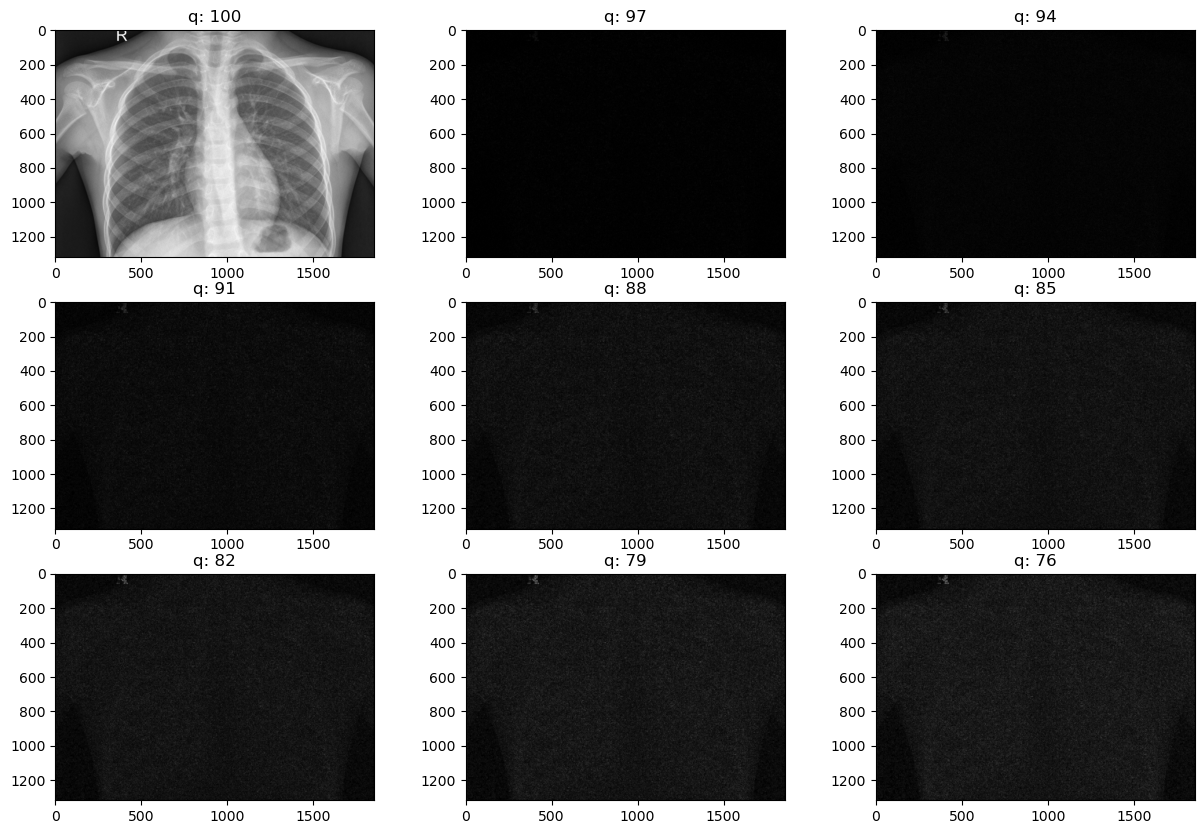

In [21]:
#test on tmpered image
orig = cv2.imread(r"E:\Image_forgery detection\Image_forgery detection\Datasets\NORMAL\NORMAL(0).jpg")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 3
    img = compute_ela_cv(path=r"E:\Image_forgery detection\Image_forgery detection\Datasets\NORMAL\NORMAL(0).jpg", quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [23]:
images_dir = r"E:\Image_forgery detection\Image_forgery detection\Datasets"

In [24]:
batch_size = 32
img_height = 224
img_width = 224

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3266 files belonging to 2 classes.
Using 2613 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3266 files belonging to 2 classes.
Using 653 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['Forged', 'NORMAL']


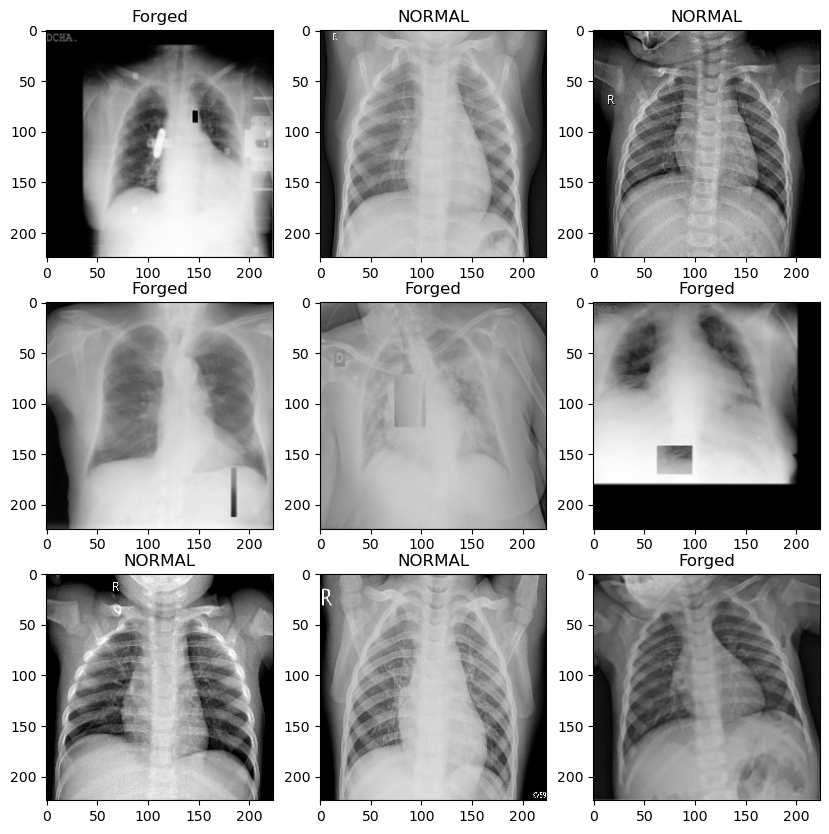

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [31]:
from tensorflow.keras import layers

# Use the Rescaling layer directly
normalization_layer = layers.Rescaling(1./255)


In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [36]:
from tensorflow.keras import layers, Sequential
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,498 (24.59 MB)

 Trainable params: 6,446,498 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8144 - loss: 0.7110 - val_accuracy: 0.9877 - val_loss: 0.0492
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9809 - loss: 0.0619 - val_accuracy: 0.9954 - val_loss: 0.0220
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9847 - val_loss: 0.0573
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9936 - loss: 0.0163 - val_accuracy: 0.9969 - val_loss: 0.0244
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9986 - loss: 0.0059 - val_accuracy: 0.9969 - val_loss: 0.0238


In [41]:
model.save("Medical_Image_forgery.h5")

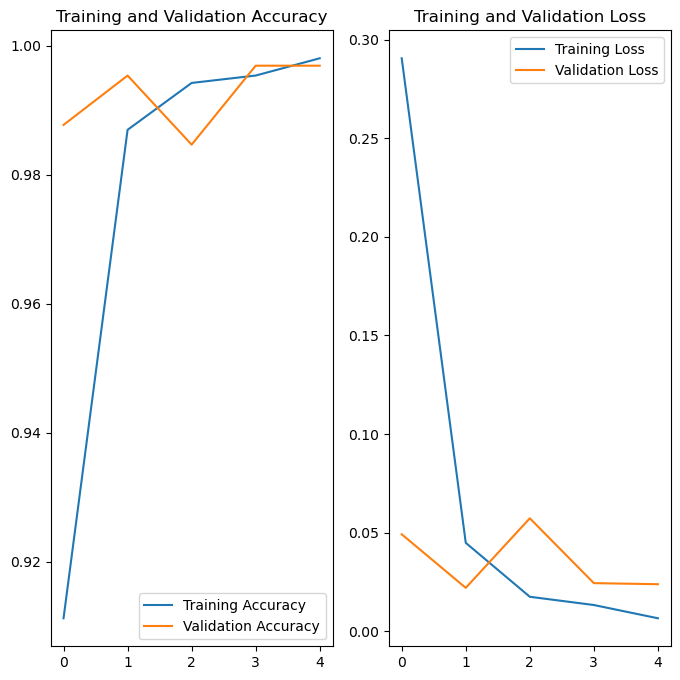

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False
)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# Use the predict method instead of predict_generator
predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 3266 images belonging to 2 classes.


C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step


In [48]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [49]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [50]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

      Forged       1.00      0.99      0.99      2000
      NORMAL       0.98      1.00      0.99      1266

    accuracy                           0.99      3266
   macro avg       0.99      0.99      0.99      3266
weighted avg       0.99      0.99      0.99      3266



In [51]:
from tensorflow import keras
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np

In [58]:
#importing VGG16 algorithm 
VGG=keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable=False

In [59]:
model=keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=2,activation='softmax')
    
])

In [60]:
model.compile(optimizer='adam',loss=tf.losses.CosineSimilarity(),metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [63]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras.applications.imagenet_utils import preprocess_input
# Load the trained model
model = load_model('Image_forgery.h5')

# Load the input image
img = cv2.imread(r'E:\Image_forgery detection\Image_forgery detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif')


from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
img_path=r'E:\Image_forgery detection\Image_forgery detectionC:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif'
img =image.load_img(img_path,target_size=(224,224))

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

print('image',x.shape)

my_image=imread(img_path)
plt.imshow(my_image,cmap='gray')

print(model.predict(x))


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'Image_forgery.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
#test on tmpered image
orig = cv2.imread(r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 3
    img = compute_ela_cv(path=r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif", quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

In [ ]:
#test on authentic image

orig = cv2.imread(r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Au\Au_ani_00001.jpg")
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 3
    img = compute_ela_cv(path=r"C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\datasets\Au\Au_ani_00001.jpg", quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)


In [ ]:
import numpy as np
import warnings
import keras

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator




def m1():
    def VGGupdated(input_tensor=None,classes=2):
        img_rows,img_cols=224,224     #default
        img_channels=3

        img_dim=(img_rows,img_cols,img_channels)

        img_input=Input(shape=img_dim)
 
        #block1
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
        x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

        # Block 2
        x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
        x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

        # Block 3
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
        x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

        # Block 4
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

        # Block 5
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)

        model=Model(inputs=img_input,outputs=x,name='VGG16_demo')
        return model




    model=VGGupdated(classes=2)

    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


    model.save(r"stmodel.h5")

m1()

In [ ]:
def vggtrain():

    
    print("Model is loading wait")
    model=load_model(r"stmodel.h5")
    dataset_path=os.listdir(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data')
    room_types=os.listdir(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data')
    
    rooms=[]
    for item in room_types:
        all_rooms=os.listdir(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data'+'/'+item)
    
        for room in all_rooms:
            rooms.append((item,str(r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data'+'/'+item)+'/'+room))
            #print(rooms)
    
    
    rooms_df=pd.DataFrame(data=rooms,columns=['Image type','image'])
    print(rooms_df)
    
    
    
    print("Total Images:",len(rooms_df))
    room_count=rooms_df['Image type'].value_counts()
    print("Images in category:",room_count)
    
    import cv2
    path=r'C:\Users\Rohit94\Documents\project_2023\Image-Forgery-Detection\Image_forgery_detection\data'
    
    img_size=224
    
    images=[]
    labels=[]
    tamp=0
    org=0
    
    for i in room_types:
        data_path=path +'/'+ str(i)
        filenames=[i for i in os.listdir(data_path)]
    
        for f in filenames:
            if i=='original':
                org+=1
            else:
                tamp+=1
            img=cv2.imread(data_path+'/'+f)
            img=cv2.resize(img,(img_size,img_size))
            images.append(img)
            labels.append(i)
    

    images=np.array(images)
    images=images.astype('float32')/255.0
    #images.shape

    #print(images)

    from sklearn.preprocessing import LabelEncoder,OneHotEncoder
    from sklearn.compose import ColumnTransformer
    y=rooms_df['Image type'].values
    #print(y)
    y_labelencoder=LabelEncoder()
    #print(len(y.shape))
    y=y_labelencoder.fit_transform(y)
    #print(y)
    
    y=y.reshape(-1,1)
    #print(y)
    ct=ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
    y = np.array(ct.fit_transform(y))
    #print(y)


    from sklearn.utils import shuffle
    from sklearn.model_selection import train_test_split

    images, Y=shuffle(images,y,random_state=1)
    train_x,test_x,train_y,test_y=train_test_split(images,y,test_size=0.05,random_state=415)

    model.fit(train_x,train_y,batch_size=2,epochs=1,verbose=0,)

    history=model.fit(train_x,train_y,batch_size=2,epochs=1,verbose=1,validation_data=(test_x,test_y))
    print(history.history)
    print(history.history['val_accuracy'])

    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('plotting')
    plt.ylabel('acc loss')
    plt.xlabel('epoch')
    plt.legend(['acc','valacc','loss','valloss'],loc='upper left')
    plt.show()
    
    
    model.save("stmodel.h5")
    _, trainacc = model.evaluate(train_x, train_y)
    _, testacc = model.evaluate(test_x, test_y)

    import matplotlib.pyplot as plt
    data={"ORIGINAL":org,"TAMPERED":tamp}
    Imgcat=list(data.keys())
    Imgcou=list(data.values())
    fig=plt.figure(figsize=(3,3))
    plt.bar(Imgcat,Imgcou,color=['blue','green'],width=0.5)
    plt.xlabel("Image Types")
    plt.ylabel("No of Images")
    plt.show()

    
    import matplotlib.pyplot as plt
    fig=plt.figure()
    fig.patch.set_facecolor('lightcyan')
    fig.suptitle("ACCURACY OF VGG16 MODEL\nTrain_Accuracy:{}\nTest_Accuracy{}:".format(trainacc,testacc),fontsize=20,fontweight='bold',color='lime')
    

    
    plt.show()
    

    
    return True

a=vggtrain()